In [4]:
import numpy as np

In [5]:
a = np.array([1,2,3])
b = np.array([4,5,6])
print(np.dot(a, b))

32


In [10]:
#パーセプトロン定義
def perceptron(x, W, h):
    y = np.dot(x, W)
    if y > h:
        y = 1
    else:
        y = 0
    return y

In [11]:
#自分で重みとしきい値を設定してみよう
x = [0, 0]
W = [1, 1]
h = 0.5
perceptron(x, W, h)

0

t:188
f:62
[ 0.32156836  0.33156623]
0.340113378957


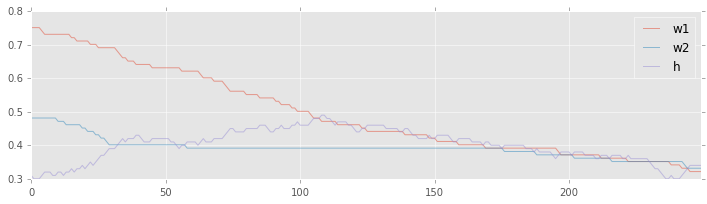

In [14]:
#パーセプトロンデモ
import random
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('ggplot') 

#初期化
#入力
X = []
#教師信号
R = []
#データセット作成
for i in range(0, 500):
    x = [random.randint(0, 1), random.randint(0, 1)]
    X.append(x)
    if x[0] == 1 & x[1] ==1:
        R.append(1)
    else:
        R.append(0)
#    if x[0] == x[1] :
#        R.append(1)
#    else:
#        R.append(0)
        
#テスト用と評価用に分ける
X_train = np.array(X[:250])
R_train = np.array(R[:250])

X_eval = np.array(X[250:])
R_eval = np.array(R[250:])

#結合重み
W = np.random.rand(2)
#しきい値
h = np.random.rand()
#学習率
a = 0.01


results = []
for x, r in zip(X_train, R_train):
    result = []
    y =perceptron(x, W, h)
    for  (i,  x_in) in enumerate(x):
        W[i] = W[i] + a*(r - y)* x_in
        result.append(W[i])
    h = h - a*(r - y)
    result.append(h)
    results.append(result)
    

t = 0
f = 0
for x, r in zip(X_eval, R_eval):
    y =perceptron(x, W, h)
    if y == r:
        t += 1
    else:
        f += 1

print('t:' + str(t))
print('f:' + str(f))
print(W)
print(h)

#表示
df = pd.DataFrame(results, columns=['w1', 'w2', 'h'])
df.plot( y=['w1', 'w2', 'h'], figsize=(12,3), alpha=0.5)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

In [5]:
model = VGG16(weights='imagenet', include_top=False)

img_path = './images/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
features.shape

(1, 7, 7, 512)

In [6]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [7]:
model = ResNet50(weights='imagenet')

img_path = './images/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds))

Predicted: [[('n02504458', 'African_elephant', 0.90305239), ('n01871265', 'tusker', 0.083503358), ('n02504013', 'Indian_elephant', 0.013397283), ('n02437312', 'Arabian_camel', 5.5643477e-06), ('n02391049', 'zebra', 4.3384721e-06)]]
